In [1]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from sklearn import metrics
from sklearn import datasets
import pandas as pd

%matplotlib inline

In [2]:
# Load the iris dataset

iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head() # See the first 5 rows

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
x = iris_df.iloc[:, [0,1,2,3]].values

In [4]:
# Finding the optimum number of clusters for Gaussian Mixture


def SelBest(arr:list, X:int):
    dx=np.argsort(arr)[:X]
    return arr[dx]


n_clusters=np.arange(2, 20)
sils=[]
sils_err=[]
iterations=20
for n in n_clusters:
    tmp_sil=[]
    for _ in range(iterations):
        gmm= GaussianMixture(n, n_init=2).fit(x) 
        labels=gmm.predict(x)
        sil=metrics.silhouette_score(x, labels, metric='euclidean')
        tmp_sil.append(sil)
    val=np.mean(SelBest(np.array(tmp_sil), int(iterations/5)))
    err=np.std(tmp_sil)
    sils.append(val)
    sils_err.append(err)

Text(0, 0.5, 'Score')

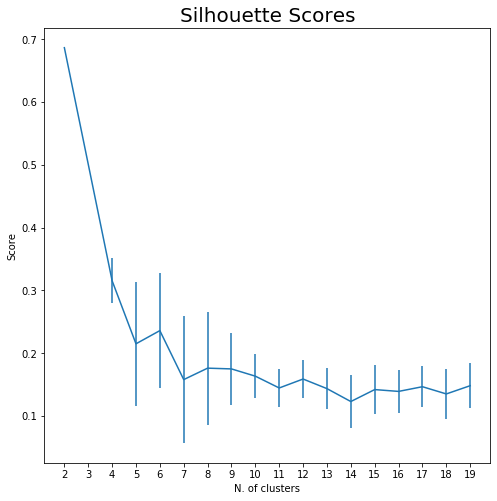

In [5]:
plt.figure(1, figsize=(8,8))

plt.errorbar(n_clusters, sils, yerr=sils_err)
plt.title("Silhouette Scores", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("N. of clusters")
plt.ylabel("Score")

In [6]:
#Call the Gaussian Mixture Model

gmm = GaussianMixture(n_components = 3) 
gmm.fit(x) 
y = gmm.predict(x)
proba_list = gmm.predict_proba(x)

In [7]:
print(y)
print(proba_list)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 2 1 2
 2 2 2 1 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
[[1.00000000e+000 6.06216336e-035 1.01178227e-043]
 [1.00000000e+000 2.47801094e-028 9.23008233e-031]
 [1.00000000e+000 4.01248422e-030 1.02746863e-035]
 [1.00000000e+000 2.59713998e-026 1.59307037e-031]
 [1.00000000e+000 2.54371410e-035 3.78557282e-046]
 [1.00000000e+000 3.19483943e-035 9.46330650e-045]
 [1.00000000e+000 5.98696069e-029 9.44216654e-036]
 [1.00000000e+000 5.93538905e-032 6.54499083e-040]
 [1.00000000e+000 2.62518847e-024 2.31571000e-027]
 [1.00000000e+000 8.99167536e-029 2.17539007e-035]
 [1.00000000e+000 5.84543182e-038 4.20168837e-049]
 [1.00000000e+000 2.89424930e-029 2.07107653e-038]
 [1.00000000e+000 1.97557310e-028 1.29857342e-033]
 [1.00000000e+000 7.02509209e-0

In [8]:
# print the converged log-likelihood value 
print(gmm.lower_bound_) 
  
# print the number of iterations needed for the log-likelihood value to converge 
print(gmm.n_iter_)

-1.2014746139064725
17


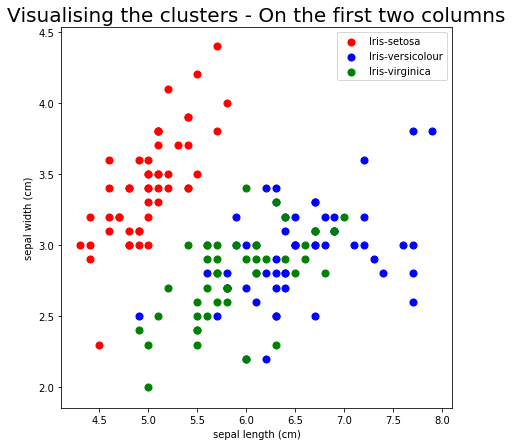

In [9]:
# Visualising the clusters - On the first two columns

plt.figure(1, figsize=(7,7))

plt.title("Visualising the clusters - On the first two columns", fontsize=20)
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")

plt.scatter(x[y == 0, 0], x[y == 0, 1], 
            s = 50, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y == 1, 0], x[y == 1, 1], 
            s = 50, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y == 2, 0], x[y == 2, 1],
            s = 50, c = 'green', label = 'Iris-virginica')
plt.legend()

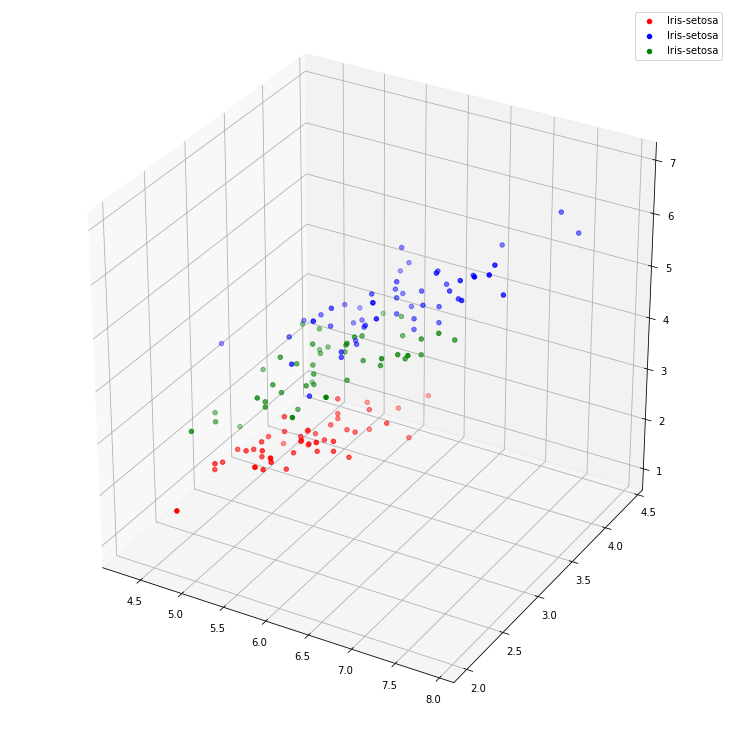

In [10]:
# Visualising the clusters - On the first three columns

fig = plt.figure(1, figsize=(10,10))
ax = Axes3D(fig)
ax.scatter(x[y == 0, 0], x[y == 0, 1], x[y == 0, 2]
           , c = 'red', label = 'Iris-setosa')
ax.scatter(x[y == 1, 0], x[y == 1, 1], x[y == 1, 2]
           , c = 'blue', label = 'Iris-setosa')
ax.scatter(x[y == 2, 0], x[y == 2, 1], x[y == 2, 2]
           , c = 'green', label = 'Iris-setosa')
ax.legend()